In [ ]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CMU-MOSEI Dataset

In [ ]:
!git clone https://github.com/CMU-MultiComp-Lab/CMU-MultimodalSDK.git
%cd CMU-MultimodalSDK
!pip install -r requirements.txt
!pip install .

Cloning into 'CMU-MultimodalSDK'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 100 (delta 13), reused 95 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (100/100), 294.05 KiB | 2.72 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/CMU-MultimodalSDK/mmsdk/mmdatasdk/dataset/standard_datasets/CMU_MOSEI/CMU-MultimodalSDK
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.9 MB/s eta 0:00:00
Processing /content/CMU-MultimodalSDK/mmsdk/mmdatasdk/dataset/standard_datasets/CMU_MOSEI/CMU-MultimodalSDK
  Preparing metadata (setup.py) ... done
  Created wheel for mmsdk: filename=mmsdk-1.1.0-py3-none-any.whl size=79210 sha256=22312a5c421fe8143afd5e22f6a136a56f764b142cff3c76c035ebec3b83f07f
  Stored in directory: /root/.cache/pip/wheels/ae/6c/8c/56f4abbf0cf403d61ad2f86e4a81163baf5441ba3e6ed95697
Successfully built mmsdk


In [ ]:
import sys
sys.path.append("/content/CMU-MultimodalSDK")
from mmsdk import mmdatasdk
print("✅ mmsdk installed successfully!")


✅ mmsdk installed successfully!


/content/CMU-MultimodalSDK/mmsdk/mmdatasdk/dataset/standard_datasets/CMU_MOSEI/CMU-MultimodalSDK/mmsdk/mmdatasdk/computational_sequence/file_ops.py:53: SyntaxWarning: "is" with a literal. Did you mean "=="?
  metadataHandle.create_dataset(metadataKey,(1,),dtype=h5py.special_dtype(vlen=unicode) if sys.version_info.major is 2 else h5py.special_dtype(vlen=str))
/content/CMU-MultimodalSDK/mmsdk/mmdatasdk/dataset/standard_datasets/CMU_MOSEI/CMU-MultimodalSDK/mmsdk/mmdatasdk/computational_sequence/file_ops.py:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
  cast_operator=unicode if sys.version_info.major is 2 else str


In [ ]:
from mmsdk import mmdatasdk
print("✅ mmsdk is working!")


✅ mmsdk is working!


In [ ]:
from mmsdk import mmdatasdk

# Define dataset path
dataset_path = "/content/drive/MyDrive/Research on BD NYU /datasets/CMU-MOSEI"

# Load CMU-MOSEI dataset
cmu_mosei = mmdatasdk.mmdataset(mmdatasdk.cmu_mosei.labels, dataset_path)

# List available features
print(cmu_mosei.keys())

[2025-03-01 13:55:52.720] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSEI/labels/CMU_MOSEI_Labels.csd to /content/drive/MyDrive/Research on BD NYU /datasets/CMU-MOSEI/CMU_MOSEI_Labels.csd...


[2025-03-01 13:55:53.427] | Success | Download complete!
[2025-03-01 13:55:53.436] | Success | Computational sequence read from file /content/drive/MyDrive/Research on BD NYU /datasets/CMU-MOSEI/CMU_MOSEI_Labels.csd ...
[2025-03-01 13:55:53.897] | Status  | Checking the integrity of the <All Labels> computational sequence ...
[2025-03-01 13:55:53.898] | Status  | Checking the format of the data in <All Labels> computational sequence ...


[2025-03-01 13:55:55.496] | Success | <All Labels> computational sequence data in correct format.
[2025-03-01 13:55:55.496] | Status  | Checking the format of the metadata in <All Labels> computational sequence ...
[2025-03-01 13:55:55.496] | Warning | <All Labels> computational sequence does not have all the required metadata ... continuing 
[2025-03-01 13:55:55.496] | Success | Dataset initialized successfully ... 
dict_keys(['All Labels'])


In [ ]:
# Get the list of available video IDs
video_ids = list(cmu_mosei["All Labels"].keys())

print(f"✅ Found {len(video_ids)} videos in CMU-MOSEI dataset.")
print("Example video ID:", video_ids[0])  # Print first video ID

✅ Found 3293 videos in CMU-MOSEI dataset.
Example video ID: --qXJuDtHPw


In [ ]:
# Select a sample video
video_id = video_ids[0]

# Get sentiment & emotion annotations
annotations = cmu_mosei["All Labels"][video_id]

# Check if 'metadata' exists in the annotations and print it
if "metadata" in annotations:
    print("Metadata:", annotations["metadata"])
else:
    print("Metadata not found in annotations.")

# Print feature values (sentiment & emotion labels)
print("Feature values (sentiment/emotion scores):", annotations["features"])

Metadata not found in annotations.
Feature values (sentiment/emotion scores): <HDF5 dataset "features": shape (1, 7), type "<f4">


In [ ]:
import pandas as pd

data = []

for vid in video_ids:
    for timestamp, labels in zip(cmu_mosei["All Labels"][vid]["intervals"],
                                 cmu_mosei["All Labels"][vid]["features"]):
        sentiment = labels[0]  # First value = sentiment score
        emotions = labels[1:]  # Remaining values = emotion intensities

        data.append({"video_id": vid, "start": timestamp[0], "end": timestamp[1],
                     "sentiment": sentiment, "emotions": emotions})

df = pd.DataFrame(data)
print(df.head())  # Print first few rows

      video_id    start      end  sentiment  \
0  --qXJuDtHPw   23.199   30.325   1.000000   
1  -3g5yACwYnA   82.753  100.555   1.000000   
2  -3g5yACwYnA  119.919  125.299   0.666667   
3  -3g5yACwYnA    4.840   14.052   0.000000   
4  -3g5yACwYnA   13.211   27.521   0.000000   

                                            emotions  
0               [0.6666667, 0.0, 0.0, 0.0, 0.0, 0.0]  
1   [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.6666667]  
2                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
3  [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.33333334]  
4       [0.33333334, 0.33333334, 0.0, 0.0, 0.0, 0.0]  


🔹 Columns Explained:
	•	video_id → Unique video ID
	•	start, end → Time range of annotation
	•	sentiment → Sentiment score (-3 = negative, +3 = positive)
	•	emotions → Array of emotion intensities (happy, sad, anger, disgust, surprise, fear)

<Axes: >

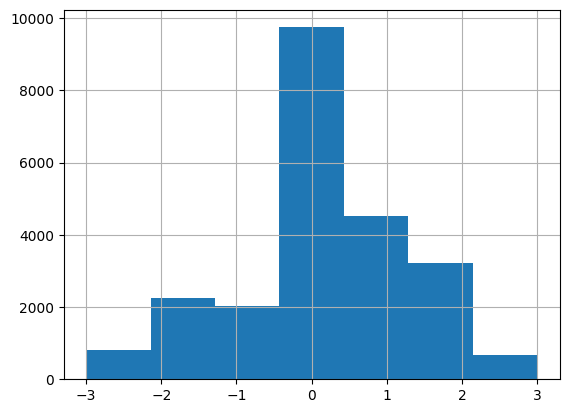

In [ ]:
df["sentiment"].hist(bins=7)

In [ ]:
positive_sentiments = df[df["sentiment"] > 0]
print(positive_sentiments)

          video_id    start      end  sentiment  \
0      --qXJuDtHPw   23.199   30.325   1.000000   
1      -3g5yACwYnA   82.753  100.555   1.000000   
2      -3g5yACwYnA  119.919  125.299   0.666667   
5      -3g5yACwYnA   26.541   41.300   1.000000   
6      -3g5yACwYnA   74.083   82.776   0.666667   
...            ...      ...      ...        ...   
23252  zwTrXwi54us   25.154   40.482   0.333333   
23253  zwTrXwi54us   40.160   48.444   0.333333   
23256  zwTrXwi54us   52.652   57.942   1.000000   
23257  zwTrXwi54us   57.980   69.326   0.666667   
23258  zx4W0Vuus-I   15.057   38.327   1.000000   

                                               emotions  
0                  [0.6666667, 0.0, 0.0, 0.0, 0.0, 0.0]  
1      [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.6666667]  
2                        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
5                  [0.6666667, 0.0, 0.0, 0.0, 0.0, 0.0]  
6           [0.0, 0.6666667, 0.0, 0.0, 0.0, 0.33333334]  
...                                    

In [ ]:
df["anger"] = df["emotions"].apply(lambda x: x[2])  # Extract anger scores
print(df[["video_id", "anger"]])

          video_id  anger
0      --qXJuDtHPw    0.0
1      -3g5yACwYnA    0.0
2      -3g5yACwYnA    0.0
3      -3g5yACwYnA    0.0
4      -3g5yACwYnA    0.0
...            ...    ...
23254  zwTrXwi54us    0.0
23255  zwTrXwi54us    0.0
23256  zwTrXwi54us    0.0
23257  zwTrXwi54us    0.0
23258  zx4W0Vuus-I    0.0

[23259 rows x 2 columns]


In [ ]:
# Step 1: Install Git (if not already available)
!apt-get install git

# Step 2: Define the folder where you want to save the dataset
dataset_directory = '/content/drive/MyDrive/Research on BD NYU /datasets/OpenNeuro'

# Step 3: Create the directory if it doesn't exist
import os
os.makedirs(dataset_directory, exist_ok=True)

# Step 4: Clone the GitHub repository into the default directory
!git clone https://github.com/OpenNeuroDatasets/ds000164.git

# Step 5: Move the cloned dataset to your desired folder
import shutil

# Move the cloned 'ds000164' folder into the specified directory
shutil.move('ds000164', os.path.join(dataset_directory, 'ds000164'))

# Step 6: List the files in the new location to verify
import os
print(os.listdir(dataset_directory))

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
fatal: destination path 'ds000164' already exists and is not an empty directory.
['ds000164']


## TESS

In [ ]:
# Step 1: Install kagglehub (if not already installed)
!pip install kagglehub

# Step 2: Define the folder where you want to save the dataset
dataset_directory = '/content/drive/MyDrive/Research on BD NYU /datasets/TESS'  # Set the path to the Tess folder

# Step 3: Create the directory if it doesn't exist
import os
os.makedirs(dataset_directory, exist_ok=True)

# Step 4: Download the dataset using kagglehub and save to the Tess folder
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")

# Step 5: Print the path to the downloaded files
print("Path to dataset files:", path)

# Step 5: Move the downloaded files to the desired folder (Tess)
import shutil

# Move the downloaded dataset from the default path to the dataset directory
shutil.move(path, dataset_directory)

# Step 6: Print the path to the new location of the dataset
print("Dataset moved to:", os.path.join(dataset_directory, os.path.basename(path)))

Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1
Dataset moved to: /content/drive/MyDrive/Research on BD NYU /datasets/TESS/1
